In [49]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read in data

df = pd.read_csv('downloads/listings (2).csv')

# Who are the most frequent hosts in the database?
# What is the most popular neighbourhood?
# What is the average price for an Airbnb in Bristol?
# What is the most common room type?
# Breakdown the room types for the 10 most popular neighbourhoods



In [50]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,70820,City View - Sarah's double room.,360195,Sarah,NaN,Windmill Hill,51.43994,-2.59173,Private room,32,7,156,2019-09-12,1.83,4,44
1,117122,City Centre-Waterside Retreat,591555,Marcus,NaN,Clifton,51.45051,-2.61054,Private room,96,1,144,2019-06-09,2.45,1,362
2,176306,The White Room - Central Bristol Art House Ga...,708175,Orla,NaN,Bedminster,51.44101,-2.60121,Private room,29,21,39,2013-01-21,0.37,1,28
3,307634,Peaceful Safe Home & Clear Space 'The Lilac Room',1582810,Wendy,NaN,Easton,51.46641,-2.55533,Private room,30,3,21,2020-09-12,0.42,2,171
4,322906,HUGE Room CENTRAL location House,1156132,Sue And Toby,NaN,Ashley,51.46668,-2.58274,Private room,69,2,80,2015-07-20,0.98,2,71


In [53]:
# Is Neighbourhood completely Null?

len(df)

1465

In [55]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                           63
neighbourhood_group               1465
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        229
reviews_per_month                  229
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [57]:
# remove 'Neighbourhood_group' column

df = df.drop('neighbourhood_group', 1)

In [58]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,51.43994,-2.59173,Private room,32,7,156,2019-09-12,1.83,4,44
1,117122,City Centre-Waterside Retreat,591555,Marcus,Clifton,51.45051,-2.61054,Private room,96,1,144,2019-06-09,2.45,1,362
2,176306,The White Room - Central Bristol Art House Ga...,708175,Orla,Bedminster,51.44101,-2.60121,Private room,29,21,39,2013-01-21,0.37,1,28
3,307634,Peaceful Safe Home & Clear Space 'The Lilac Room',1582810,Wendy,Easton,51.46641,-2.55533,Private room,30,3,21,2020-09-12,0.42,2,171
4,322906,HUGE Room CENTRAL location House,1156132,Sue And Toby,Ashley,51.46668,-2.58274,Private room,69,2,80,2015-07-20,0.98,2,71


In [61]:
#What are the unique neighbourhoods in the data

df.neighbourhood.unique()


array(['Windmill Hill', 'Clifton', 'Bedminster', 'Easton', 'Ashley',
       'Brislington West', 'Westbury-on-Trym & Henleaze', 'Redland',
       'Lawrence Hill', 'Southville', 'Eastville', 'Knowle',
       'Stoke Bishop', 'Henbury & Brentry', 'Cotham', 'Stockwood',
       'Clifton Down', 'Hotwells & Harbourside',
       'Avonmouth & Lawrence Weston', 'Brislington East', 'Central',
       'Bishopston & Ashley Down', 'St George West', 'Horfield',
       'Southmead', 'Frome Vale', 'St George Central', 'Lockleaze',
       'Bishopsworth', 'Hillfields', 'Hartcliffe & Withywood',
       'Hengrove & Whitchurch Park', 'Filwood', 'St George Troopers Hill'],
      dtype=object)

In [62]:
len(df.neighbourhood.unique())

34

In [73]:
# Who are the most popular hosts on the app

top_hostID=df.host_id.value_counts().head(11)
top_hostID

65192629     122
125651447     75
226804666     50
236481623     16
403430235     14
175128252     13
164934575     12
383281375     12
176181147     12
51686051      11
282688142     10
Name: host_id, dtype: int64

In [81]:
# What are the most popular Neighbourhoods in Bristol

top_neighbourhood=df.neighbourhood.value_counts().head(10)
top_neighbourhood

Central                   200
Ashley                    157
Clifton                   124
Clifton Down              109
Lawrence Hill              79
Hotwells & Harbourside     65
Cotham                     64
Easton                     62
Southville                 59
Windmill Hill              52
Name: neighbourhood, dtype: int64

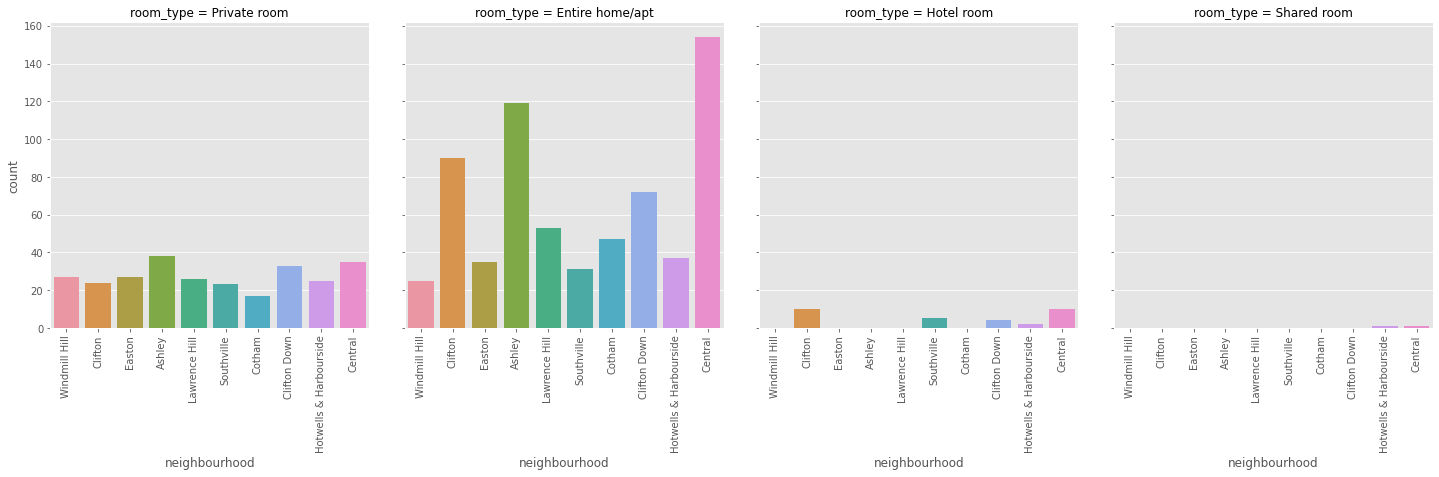

In [115]:
# Lets breakdown the room types by neighbourhood

sub_7=df.loc[df['neighbourhood'].isin(['Central','Ashley','Clifton','Clifton Down',
                 'Lawrence Hill','Hotwells & Harbourside','Cotham','Easton','Southville','Windmill Hill'])]

viz_3=sns.catplot(x='neighbourhood', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

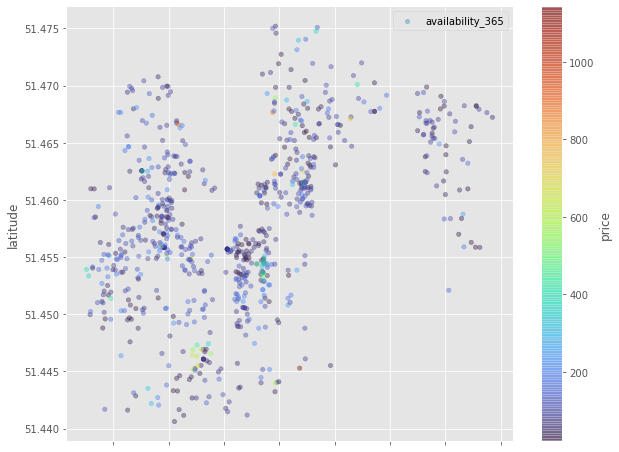

In [104]:
#let's use the longtitude and latitude data.

viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('turbo'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [109]:
# What are the 10 most reviewed listings in Bristol?

top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
249,16892839,Funky garden maisonette in Redland with parking,48269225,Kelly-Ann,Cotham,51.46979,-2.60933,Entire home/apt,68,1,640,2021-06-05,14.41,1,48
51,4086139,"Beautiful room and bathroom, central location",21194896,Sue,Cotham,51.46225,-2.59804,Private room,52,2,622,2019-12-29,7.75,1,83
155,11864632,Comfortable and Clean Flat - Great Location,10680012,Cath,Ashley,51.47115,-2.59157,Entire home/apt,76,1,588,2020-08-09,9.77,1,311
74,6362232,Views. Sleeps 1-4. Ensuite. Kitchenette. Parking.,21295528,Helen,Southville,51.44166,-2.60810,Private room,49,2,545,2021-07-12,7.37,2,274
196,14611969,Stunning traditional flat in the heart of Bristol,40145180,Marco,Cotham,51.46367,-2.59789,Entire home/apt,119,1,467,2019-10-14,7.85,1,113
493,24562587,CENTRAL - FREE PARKING - STYLISH APT - SPOTLESS,185582135,Simon,Central,51.45543,-2.59924,Entire home/apt,100,1,420,2020-01-05,11.78,1,45
126,9559959,Cosy courtyard studio near Bristol Harbourside,43800815,Olivia,Southville,51.44177,-2.59967,Entire home/apt,59,1,418,2021-05-07,8.70,3,127
58,4543852,Cosy Eco-Cabin with lake views,23560849,Ruby,Eastville,51.47682,-2.55623,Entire home/apt,70,2,409,2019-12-03,6.41,2,67
20,1096853,"Lovely quiet, clean, Double Bed+Single, with tv",487598,Maggie,Easton,51.46907,-2.56077,Private room,28,1,408,2018-07-19,4.31,3,148
13,758894,"Clifton Village, superfast internet, car permits",3996407,Joanna,Clifton,51.45524,-2.62168,Entire home/apt,134,3,405,2020-08-09,5.60,1,283


In [110]:
# What is the average price of the top 10

price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 75.5
